In [3]:
import pandas as pd  # also install lxml
import requests
import polaris as po
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
results_dict = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5465338079817164,
    "polaris/adme-fang-solu-1": 0.5273408376187639,
    "polaris/adme-fang-rppb-1": 0.7439903107573429,
    "polaris/adme-fang-hppb-1": 0.7841339451391662,
    "polaris/adme-fang-perm-1": 0.745186928011746,
    "polaris/adme-fang-rclint-1": 0.6721618362695384,
    "polaris/adme-fang-hclint-1": 0.6631674872767636,
    "tdcommons/clearance-microsome-az": 0.5315824828299351,
    "tdcommons/dili": 0.8804347826086957,
    "tdcommons/bioavailability-ma": 0.6651147322913202,
    "tdcommons/vdss-lombardo": 0.5492078389196986,
    "tdcommons/herg": 0.8608247422680412
}

In [5]:
chemprop_results = {
    "polaris/pkis2-ret-wt-cls-v2": 0.4022174328484946,
    "polaris/adme-fang-solu-1": 0.5962083321846253,
    "polaris/adme-fang-rppb-1": 0.22811751509425005,
    "polaris/adme-fang-hppb-1": 0.5839256862476387,
    "polaris/adme-fang-perm-1": 0.6860496540025689,
    "polaris/adme-fang-rclint-1": 0.6993555044203762,
    "polaris/adme-fang-hclint-1": 0.6587254331645709,
    "tdcommons/clearance-microsome-az": 0.4447433483975412,
    "tdcommons/dili": 0.9086956521739131,
    "tdcommons/bioavailability-ma": 0.5839707349517792,
    "tdcommons/vdss-lombardo": 0.47940850366929666,
    "tdcommons/herg": 0.6846833578792342
}

In [6]:
fastprop_results = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5694927443665828,
    "polaris/adme-fang-solu-1": 0.5401840084292533,
    "polaris/adme-fang-rppb-1": 0.7619337388626671,
    "polaris/adme-fang-hppb-1": 0.5255383512140337,
    "polaris/adme-fang-perm-1": 0.7495456490144543,
    "polaris/adme-fang-rclint-1": 0.024598238503027083,
    "polaris/adme-fang-hclint-1": 0.6380389767780245,
    "tdcommons/clearance-microsome-az": 0.37788390466263777,
    "tdcommons/dili": 0.8869565217391304,
    "tdcommons/bioavailability-ma": 0.6744263385433987,
    "tdcommons/vdss-lombardo": 0.47489729368571043,
    "tdcommons/herg": 0.839322533136966
}

In [7]:
best_models = {}

In [8]:
metadata = {}

In [9]:
for benchmark_name in results_dict.keys():
    benchmark = po.load_benchmark(benchmark_name)
    response = requests.get(f'https://polarishub.io/benchmarks/{benchmark_name}')
    results_table = pd.read_html(response.text)[0]
    best = results_table[benchmark.main_metric.label][0]
    if isinstance(best, str):
        best = 0.0
    best_models[benchmark_name] = best
    metadata[benchmark_name] = {
        "metric": benchmark.main_metric.label,
        "best_name": results_table['Name'][0],
    }

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[2025-04-02 17:16:47] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=970372;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=876093;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=811106;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=848685;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:16:47]  Success: Fetching dataset                                                                 ]8;id=984646;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=66221;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=755013;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=871009;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=438832;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=17889;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=870037;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=169902;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:16:50] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=220487;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=831044;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=128582;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=51471;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:16:50]  Success: Fetching dataset                                                                 ]8;id=645239;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=556098;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=347680;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=117280;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=447206;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=997474;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=80505;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=378152;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:16:52] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=955319;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=257311;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=528176;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=326895;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:16:52]  Success: Fetching dataset                                                                 ]8;id=508091;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=31933;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=611454;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=253663;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=633776;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=929861;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=260658;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=47855;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:16:54] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=164191;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=931130;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=536374;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=64869;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:16:54]  Success: Fetching dataset                                                                 ]8;id=923256;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=711219;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=531334;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=536614;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=472951;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=73188;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=349067;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=618002;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:16:56] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=657581;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=485205;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=229998;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=214636;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:16:56]  Success: Fetching dataset                                                                 ]8;id=77799;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=926046;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=850242;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=751549;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=761397;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=597669;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=846455;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=174038;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:16:58] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=200812;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=162688;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=666511;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=733154;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:16:58]  Success: Fetching dataset                                                                 ]8;id=74092;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=983273;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=112340;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=765409;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=327334;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=288392;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=200671;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=413112;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:17:00] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=340526;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=523098;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=580336;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=403480;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:17:00]  Success: Fetching dataset                                                                 ]8;id=562800;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=168303;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=142914;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=35658;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=511408;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=219432;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=927748;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=622185;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:17:02] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=713119;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=972686;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=538505;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=672132;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:17:02]  Success: Fetching dataset                                                                 ]8;id=594320;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=637893;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=963580;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=247881;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=474911;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=178916;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=84188;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=608872;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:17:04] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=720025;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=664589;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=801029;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=13628;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:17:04]  Success: Fetching dataset                                                                 ]8;id=386256;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=974157;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=805783;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=344794;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=982381;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=107466;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=329770;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=811765;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:17:06] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=661255;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=148341;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=59449;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=759437;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:17:06]  Success: Fetching dataset                                                                 ]8;id=247985;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=323654;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=668168;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=667233;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=910056;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=443493;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=739229;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=32777;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:17:08] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=895839;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=282761;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=435737;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=580744;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:17:08]  Success: Fetching dataset                                                                 ]8;id=327017;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=871000;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=450429;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=607302;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=132810;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=397131;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=286241;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=927631;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-02 17:17:10] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=835394;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=556953;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=994531;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=227057;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[17:17:10]  Success: Fetching dataset                                                                 ]8;id=632985;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=2223;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=437390;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=736712;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=94447;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=174264;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=453598;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=973131;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/tmp/ipykernel_394929/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


## Comparison against local benchmarks

In [10]:
df = pd.DataFrame.from_dict({"ChemProp": chemprop_results, "fastprop": fastprop_results, "fastfound": results_dict})

--- Ranks per Benchmark (1 = Best, using metadata) ---
                                  ChemProp  fastprop  fastfound
polaris/pkis2-ret-wt-cls-v2            3.0       1.0        2.0
polaris/adme-fang-solu-1               1.0       2.0        3.0
polaris/adme-fang-rppb-1               3.0       1.0        2.0
polaris/adme-fang-hppb-1               2.0       3.0        1.0
polaris/adme-fang-perm-1               3.0       1.0        2.0
polaris/adme-fang-rclint-1             1.0       3.0        2.0
polaris/adme-fang-hclint-1             2.0       3.0        1.0
tdcommons/clearance-microsome-az       2.0       3.0        1.0
tdcommons/dili                         1.0       2.0        3.0
tdcommons/bioavailability-ma           3.0       1.0        2.0
tdcommons/vdss-lombardo                2.0       3.0        1.0
tdcommons/herg                         3.0       2.0        1.0


--- Average Place (Rank) per Model (Lower is Better) ---
fastfound    1.750000
fastprop     2.083333
ChemProp  

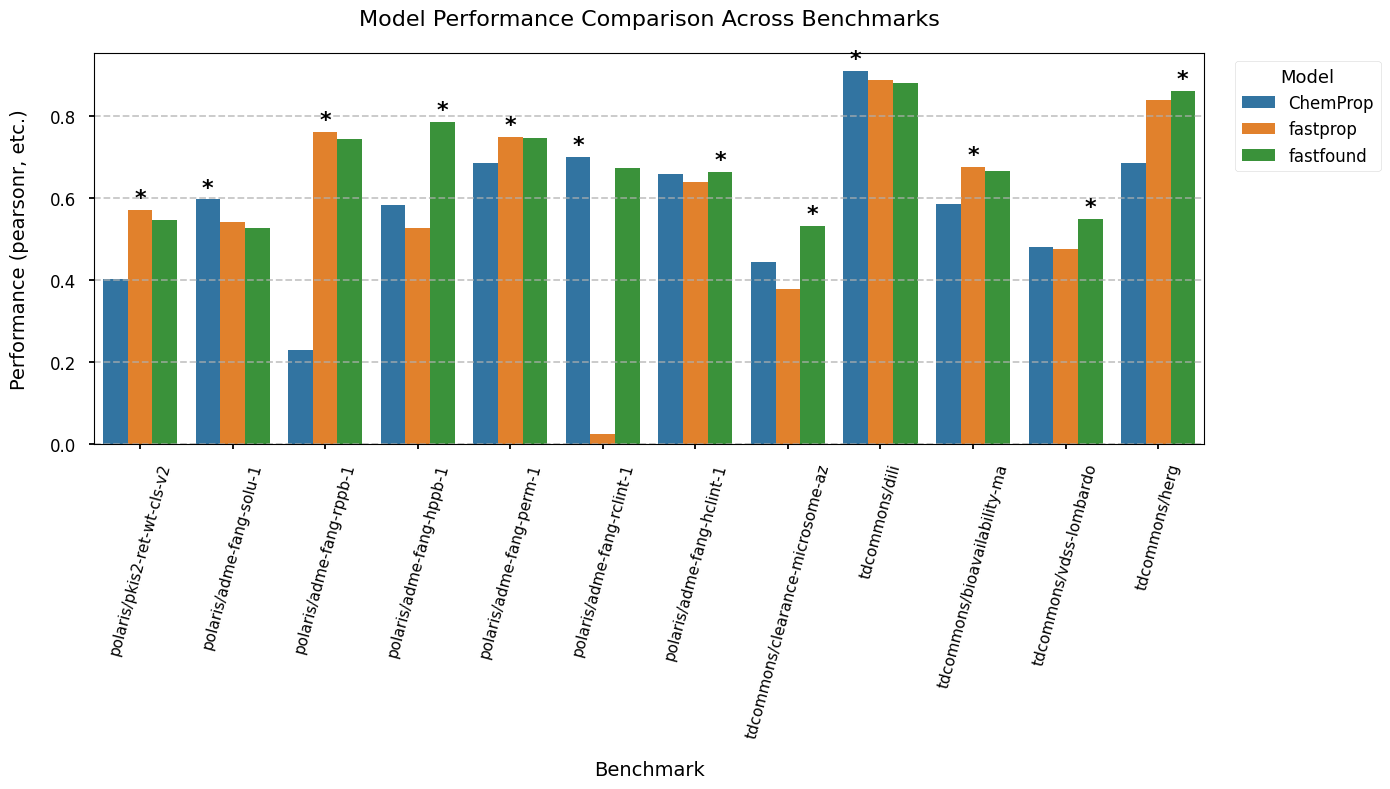

In [27]:
# --- 2. Define Metric Properties ---
# Define which metrics are better when higher
HIGHER_IS_BETTER_METRICS = {'roc_auc', 'pr_auc', 'pearsonr', 'spearmanr', 'accuracy', 'f1'}
# Add any other metrics where higher values are better
# Metrics not in this set will be assumed to have lower values as better (e.g., rmse, mae)

def get_ascending_for_metric(metric_name):
    """
    Determines if ranking should be ascending for a given metric.
    rank(ascending=False) means higher values get lower ranks (rank 1).
    rank(ascending=True) means lower values get lower ranks (rank 1).
    Returns the value for the 'ascending' parameter in pandas rank.
    """
    return metric_name not in HIGHER_IS_BETTER_METRICS

# --- 3. Calculate Performance Statistics ---

# 3.2. Calculate Ranks per Benchmark (using metadata)
def rank_row(row):
    benchmark_name = row.name
    if benchmark_name not in metadata:
        print(f"Warning: Benchmark '{benchmark_name}' not found in metadata. Skipping ranking.")
        return pd.Series([np.nan] * len(row), index=row.index) # Return NaNs if no metadata

    metric = metadata[benchmark_name].get('metric')
    if not metric:
         print(f"Warning: Metric not found for benchmark '{benchmark_name}' in metadata. Skipping ranking.")
         return pd.Series([np.nan] * len(row), index=row.index) # Return NaNs if no metric

    ascending = get_ascending_for_metric(metric)
    # method='min' assigns the minimum rank to tied models
    return row.rank(ascending=ascending, method='min')

# Apply the ranking function row-wise
ranks = df.apply(rank_row, axis=1)
print("--- Ranks per Benchmark (1 = Best, using metadata) ---")
print(ranks)
print("\n" + "="*30 + "\n")

# 3.3. Calculate Average Place (Average Rank) per Model
# Drop benchmarks that couldn't be ranked (if any NaNs occurred) before calculating mean
average_place = ranks.dropna(axis=0, how='all').mean(axis=0).sort_values()
print("--- Average Place (Rank) per Model (Lower is Better) ---")
print(average_place)
print("\n" + "="*30 + "\n")

# 3.4. (Optional) Count Number of #1 Finishes per Model
first_place_finishes = (ranks == 1).sum(axis=0).sort_values(ascending=False)
print("--- Number of #1 Finishes per Model ---")
print(first_place_finishes)
print("\n" + "="*30 + "\n")

# --- 4. Plotting: Grouped Bar Chart with Best Model Indicator ---

# 4.1. Prepare data for plotting (melt the DataFrame)
# We need the metric name for the y-axis label, but it varies.
# Let's use a generic name or pick the most common one.
all_metrics = [m.get('metric', 'N/A') for m in metadata.values()]
most_common_metric = pd.Series(all_metrics).mode()[0] if all_metrics else "Performance Score"
y_axis_label = f"Performance ({most_common_metric}, etc.)" # Indicate mixed metrics

df_melted = df.reset_index().rename(columns={'index': 'Benchmark'})
df_melted = df_melted.melt(id_vars='Benchmark', var_name='Model', value_name='Performance') # Use generic 'Performance'


# 4.2. Create the plot
plt.style.use('seaborn-v0_8-talk')
fig, ax = plt.subplots(figsize=(14, 8)) # Adjust figsize as needed

# Ensure consistent order for models in plot and legend
model_order = df.columns.tolist()

sns.barplot(
    x='Benchmark',
    y='Performance',
    hue='Model',
    data=df_melted,
    ax=ax,
    order=df.index.tolist(), # Ensure benchmark order matches original df
    hue_order=model_order   # Ensure model order matches original df
    # ci=None # Uncomment if you don't want error bars
)

# 4.3. Customize for Publication Quality
ax.set_title('Model Performance Comparison Across Benchmarks', fontsize=16, pad=20)
ax.set_xlabel('Benchmark', fontsize=14, labelpad=15)
ax.set_ylabel(y_axis_label, fontsize=14, labelpad=15)
ax.tick_params(axis='x', rotation=75, labelsize=11) # Rotate x-axis labels more if needed
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Model', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 4.4 Add Asterisk for Best Model per Benchmark
# Check if ranks DataFrame is not empty
if not ranks.empty:
    models_in_plot = model_order # Use the defined model order
    benchmarks_in_plot = df.index.tolist() # Use the defined benchmark order

    # Map benchmark names to their index in the plot (0, 1, 2...)
    benchmark_indices = {name: i for i, name in enumerate(benchmarks_in_plot)}

    # Iterate through the bar containers (one container per model)
    for model_idx, container in enumerate(ax.containers):
        model_name = models_in_plot[model_idx]

        # Iterate through the bars in this container (one bar per benchmark)
        for bar_idx, bar in enumerate(container):
            # Sometimes bar_idx might not align perfectly if data is missing,
            # It's safer to try and determine benchmark from bar's x position center
            # but let's first assume the simple index mapping works.
            try:
                 # Get the benchmark name corresponding to this bar's index position
                benchmark_name = benchmarks_in_plot[bar_idx]
                benchmark_rank_series = ranks.loc[benchmark_name]

                # Check if the rank exists is 1 for this model and benchmark
                if np.isclose(benchmark_rank_series[model_name], 1.0):
                    # Add asterisk above this bar
                    x_pos = bar.get_x() + bar.get_width() / 2
                    y_pos = bar.get_height()
                    # Add a small offset to y_pos so asterisk isn't touching the bar
                    offset = 0.005 * ax.get_ylim()[1] # Adjust offset as needed
                    ax.text(x_pos, y_pos + offset, '*', ha='center', va='bottom', color='k', fontsize=16, fontweight='bold')
            except IndexError:
                 print(f"Warning: Could not match bar index {bar_idx} to benchmark name. Skipping asterisk.")
            except KeyError:
                 print(f"Warning: Could not find rank for model '{model_name}' or benchmark '{benchmark_name}'. Skipping asterisk.")
else:
    print("Warning: Ranks DataFrame is empty, cannot add best model indicators.")


plt.tight_layout() # Adjust layout

# 4.5. Save the plot (optional)
# plt.savefig('model_performance_comparison_metadata.png', dpi=300, bbox_inches='tight')
# plt.savefig('model_performance_comparison_metadata.pdf', bbox_inches='tight')

# 4.6. Show the plot
plt.show()

## Comparison against SOTA on `polaris`

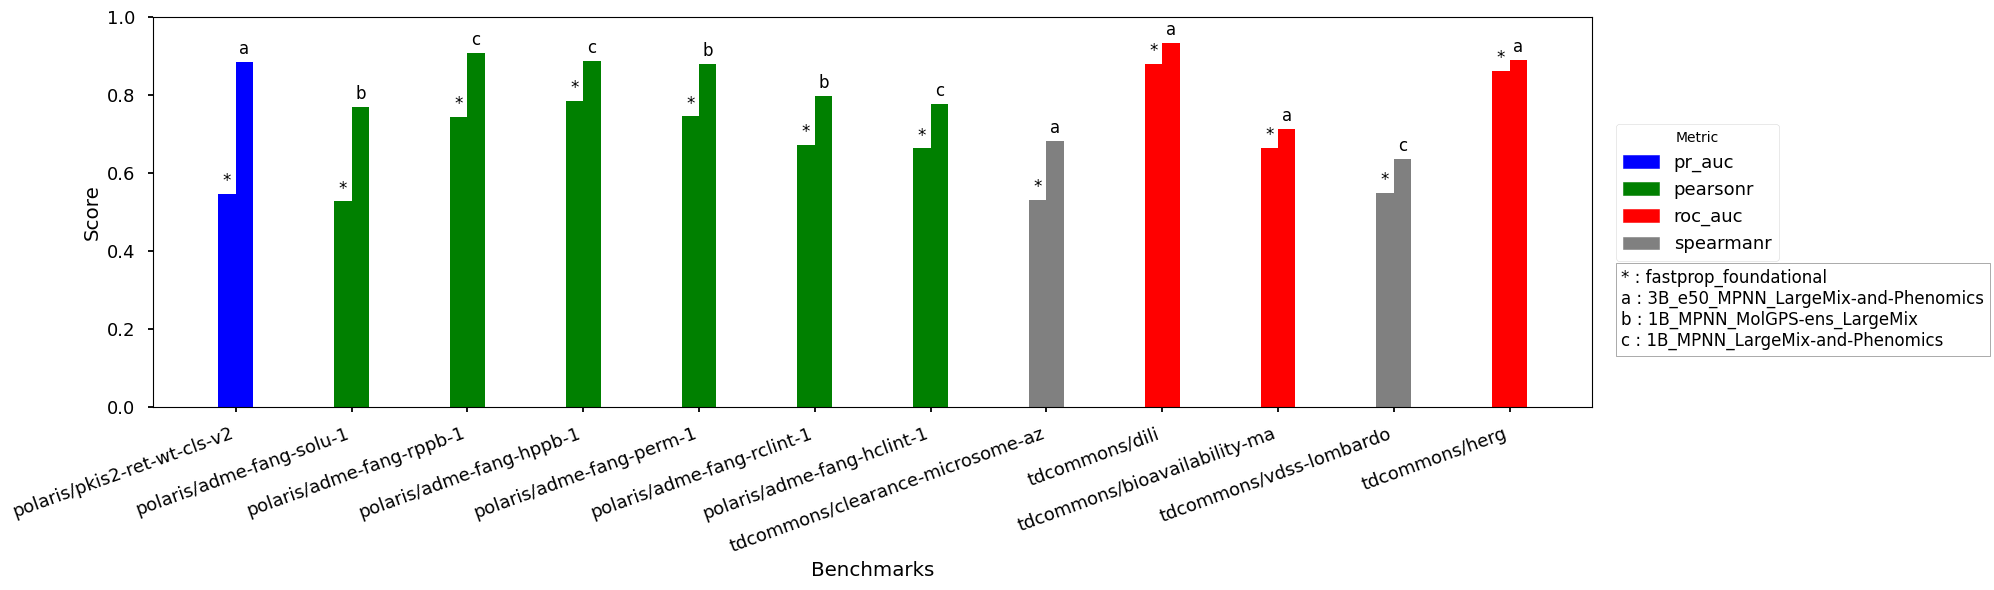

In [12]:
benchmarks = list(metadata.keys())
metrics = [d['metric'] for d in metadata.values()]
sota_name = [d['best_name'] for d in metadata.values()]
developing_values = [results_dict[b] for b in benchmarks]
sota_values = [best_models[b] for b in benchmarks]

# Assigning colors based on the metric
metric_colors = {'pr_auc': 'blue', 'pearsonr': 'green', 'roc_auc': 'red', 'spearmanr': 'grey'}
bar_colors = [metric_colors[metadata[b]['metric']] for b in benchmarks]

# Assign unique symbols for models
model_symbols = {}
model_symbols['fastprop_foundational'] = "*"
syms = iter('abcdefghijklmnopqrstuvwxyz')
for name in sota_name:
    if model_symbols.get(name, None) is None:
        model_symbols[name] = next(syms)

# Bar width and positioning
x = np.arange(len(benchmarks)) * 2  # Increased spacing between groups
width = 0.3 

# Plot bars
fig, ax = plt.subplots(figsize=(20, 6))
bars1 = ax.bar(x - width/2, developing_values, width, label="fastprop_foundation", color=bar_colors)
bars2 = ax.bar(x + width/2, sota_values, width, label="SOTA Model", color=bar_colors)

# Labels and titles
ax.set_xlabel("Benchmarks")
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(benchmarks, rotation=20, ha="right")

# Add symbols on top of bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, model_symbols['fastprop_foundational'], ha='center', fontsize=12, rotation=0)

for bar, model in zip(bars2, sota_name):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, model_symbols[model], ha='center', fontsize=12, rotation=0)

# Legend for metrics
handles = [plt.Rectangle((0,0),1,1, color=color) for color in metric_colors.values()]
metric_labels = list(metric_colors.keys())
ax.legend(handles, metric_labels, title="Metric", bbox_to_anchor=(1.01, 0.75))

# Add symbol lookup legend
symbol_legend = '\n'.join([f"{sym} : {model}" for model, sym in model_symbols.items()])
plt.text(1.02, 0.25, symbol_legend, transform=ax.transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.6))

# Show plot
plt.ylim((0.0, 1.0))
plt.tight_layout()
plt.show()